In [46]:
# import third-party libraries
from   keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PIL
import tensorflow as tf
from   tensorflow import keras
from   tensorflow.keras import optimizers
from   tensorflow.keras.applications import EfficientNetB0
from   tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from   tensorflow.keras.models import Sequential
%load_ext tensorboard

# import standard libraries
import os
import random

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [121]:
# Directory paths to use
IMG_PATH = '../data/train/'
ANNOTATION_PATH = '../data/train.csv'
# TEST_IMG_PATH = '../data/test/'
# TEST_PREDICTIONS_PATH = '../data/submission.csv'
MODEL_PATH = '../models/'
LOG_PATH = '../logs/'

In [122]:
# Read and preview annotation into data frame
df = pd.read_csv(TRAIN_ANNOTATION_PATH)
df.label.replace({0: 'Real', 1: 'AI Generated'}, inplace=True)
print(f'Number of training images: {df.shape[0]}')
print(f"\nX_train label distribution\n{df.value_counts('label')}\n")
df.head(10)

Number of training images: 18618

X_train label distribution
label
AI Generated    10330
Real             8288
dtype: int64



,id,label
0,0.jpg,AI Generated
1,1.jpg,AI Generated
2,2.jpg,AI Generated
3,3.jpg,Real
4,4.jpg,AI Generated
5,5.jpg,AI Generated
6,6.jpg,AI Generated
7,7.jpg,Real
8,8.jpg,AI Generated
9,9.jpg,AI Generated


10302.jpg: AI Generated


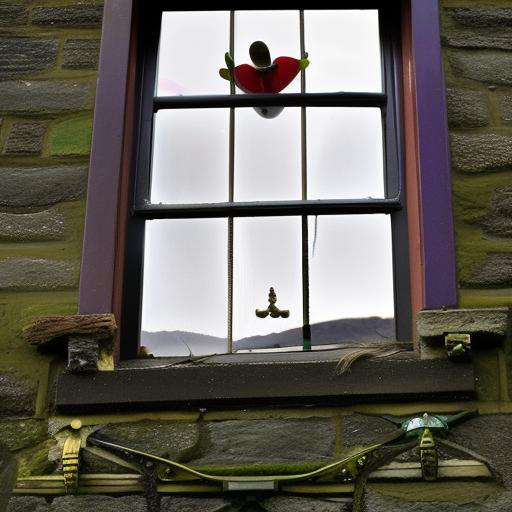

In [1585]:
images = os.listdir(TRAIN_IMG_PATH)
event = df.iloc[random.randint(0, df.shape[0])]

# A few of my favorite AI Gen'd events:
# event = df.iloc[1157] # Joe Biden Skydiving
# event = df.iloc[14964] # painting of Seth Rogan
# event = df.iloc[3055] # I imagine this one would be titled: "Squithed"
# event = df.iloc[6446] # Benedict Cumberbatches
# event = df.iloc[5275] # Stone Cold Joe Biden
# event = df.iloc[17414] # postapocalpytic painting, no memes here, I just really like this one
print(f"{event.id}: {event.label}")
PIL.Image.open(TRAIN_IMG_PATH + str(event.id))

In [1257]:
# Define some parameters for the Keras data loader and model
batch_size = 32
img_height = 180
img_width = 180
seed = 42
num_classes = 2
epochs = 10

In [28]:
# Preprocess image data located in directory with labels in separate .csv file and split into training, validation, and testing datasets
train_generator = ImageDataGenerator(rescale=1.0/255.0,validation_split=0.25)

X_train = train_generator.flow_from_dataframe(
    dataframe=df, 
    directory=TRAIN_IMG_PATH,
    x_col="id",
    y_col="label",
    subset='training',
    class_mode="categorical",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    seed=seed,
    shuffle=True,
)
                                            
X_validate = train_generator.flow_from_dataframe(
    dataframe=df, 
    directory=TRAIN_IMG_PATH,
    x_col="id",
    y_col="label",
    subset='validation',
    class_mode="categorical",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    seed=seed,
    shuffle=True,
)

Found 13964 validated image filenames belonging to 2 classes.
Found 4654 validated image filenames belonging to 2 classes.


In [29]:
test_generator = ImageDataGenerator(rescale=1.0/255.0)

X_test = 

In [11]:
# # Initiate Tensorboard for logging during model training
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=LOG_PATH)

In [13]:
# # Train Model

# STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
# STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
# history = model.fit_generator(generator=train_generator,
#                     steps_per_epoch=STEP_SIZE_TRAIN,
#                     validation_data=valid_generator,
#                     validation_steps=STEP_SIZE_VALID,
#                     epochs=epochs,
#                     callbacks=[tensorboard_callback])

In [22]:
effnet = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_height, img_width,3))

In [23]:
model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(4, activation='softmax')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs=model)

In [24]:
model.compile(loss='categorical_crossentropy', optimizer = 'Adam', metrics= ['accuracy'])

In [25]:
checkpoint = ModelCheckpoint("effnet.h5", monitor="val_accuracy", save_best_only=True, mode="auto", verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001, mode='auto', verbose=1)

In [26]:
tensorboard_callback = tf.keras.callbacks.TensorBoard("loggies", histogram_freq=1)
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 3998), started 1:47:09 ago. (Use '!kill 3998' to kill it.)

In [20]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=1, verbose=1, batch_size=32, callbacks=[tensorboard_callback, checkpoint, reduce_lr])

NameError: name 'y_train' is not defined